In [1]:
# Author : Arthur Prigent
# Email : aprigent@geomar.de

In [2]:
from load_librairies import *
import xscale.signal.fitting as xsf
import seaborn as sns
from sklearn import linear_model

def is_jja(month):
    return (month >= 6) & (month <= 8)

def is_amj(month):
    return (month >= 4) & (month <= 6)

def is_mjj(month):
    return (month >= 5) & (month <= 7)

######################
#      TO CHANGE     # 
######################

path_fig = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/figures/new_version/reviews/'
path_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/scripts/new_version/to_publish/data/'

# BF1

In [3]:

bf1_hist_cmip6_jja = xr.open_dataset(path_data+'bf1_hist_mjj_CMIP6.nc')
bf1_ssp5_cmip6_jja = xr.open_dataset(path_data+'bf1_ssp5_mjj_CMIP6.nc')

bf1_hist_cmip5_jja = xr.open_dataset(path_data+'bf1_hist_mjj_CMIP5.nc')
bf1_ssp5_cmip5_jja = xr.open_dataset(path_data+'bf1_ssp5_mjj_CMIP5.nc')


# BF2

In [4]:

#
bf2_hist_cmip6_jja = xr.open_dataset(path_data+'bf2_hist_jja_CMIP6_z20.nc')
bf2_ssp5_cmip6_jja = xr.open_dataset(path_data+'bf2_ssp5_jja_CMIP6_z20.nc')

bf2_hist_cmip5_jja = xr.open_dataset(path_data+'bf2_hist_jja_CMIP5_z20.nc')
bf2_ssp5_cmip5_jja = xr.open_dataset(path_data+'bf2_ssp5_jja_CMIP5_z20.nc')



# BF3

In [5]:

bf3_hist_cmip6_jja = xr.open_dataset('/Volumes/Arthur_disk2/Data/CMIP6/tmp_data/bf3_hist_jja_CMIP6_z20.nc')
bf3_ssp5_cmip6_jja = xr.open_dataset('/Volumes/Arthur_disk2/Data/CMIP6/tmp_data/bf3_ssp5_jja_CMIP6_z20.nc')


bf3_hist_cmip5_jja = xr.open_dataset('/Volumes/Arthur_disk2/Data/CMIP6/tmp_data/bf3_hist_jja_CMIP5_z20.nc')
bf3_ssp5_cmip5_jja = xr.open_dataset('/Volumes/Arthur_disk2/Data/CMIP6/tmp_data/bf3_ssp5_jja_CMIP5_z20.nc')




In [6]:

bf3_hist_cmip6_jja_new = xr.open_dataset(path_data+'bf3_hist_jja_CMIP6_z20.nc')
bf3_ssp5_cmip6_jja_new = xr.open_dataset(path_data+'bf3_ssp5_jja_CMIP6_z20.nc')


bf3_hist_cmip5_jja_new = xr.open_dataset(path_data+'bf3_hist_jja_CMIP5_z20.nc')
bf3_ssp5_cmip5_jja_new = xr.open_dataset(path_data+'bf3_ssp5_jja_CMIP5_z20.nc')



# STD ssta / uasa

In [7]:
# These files are created by the scripts "create_file_std_ssta_uasa_CMIP6.ipynb" 
# and "create_file_std_ssta_uasa_CMIP5.ipynb"

## UASa ##

uasa_atl4_hist_cmip6 = xr.open_dataset(path_data+'uasa_hist_monthly_CMIP6.nc')
uasa_atl4_ssp5_cmip6 = xr.open_dataset(path_data+'uasa_ssp5_monthly_CMIP6.nc')

uasa_atl4_hist_cmip5 = xr.open_dataset(path_data+'uasa_hist_monthly_CMIP5.nc')
uasa_atl4_ssp5_cmip5 = xr.open_dataset(path_data+'uasa_ssp5_monthly_CMIP5.nc')


## SSTa ##


ssta_atl3_hist_cmip5 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP5.nc')
ssta_atl3_ssp5_cmip5 = xr.open_dataset(path_data+'ssta_ssp5_monthly_CMIP5.nc')

ssta_atl3_hist_cmip6 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP6.nc')
ssta_atl3_ssp5_cmip6 = xr.open_dataset(path_data+'ssta_ssp585_monthly_CMIP6.nc')

In [8]:
## std SSTa in JJA ##

std_ssta_hist_CMIP5_jja = ssta_atl3_hist_cmip5.ssta.sel(time=is_jja(
    ssta_atl3_hist_cmip5['time.month'])).std(dim='time')

std_ssta_ssp5_CMIP5_jja = ssta_atl3_ssp5_cmip5.ssta.sel(time=is_jja(
    ssta_atl3_ssp5_cmip5['time.month'])).std(dim='time')

std_ssta_hist_CMIP6_jja = ssta_atl3_hist_cmip6.ssta.sel(time=is_jja(
    ssta_atl3_hist_cmip6['time.month'])).std(dim='time')

std_ssta_ssp5_CMIP6_jja = ssta_atl3_ssp5_cmip6.ssta.sel(time=is_jja(
    ssta_atl3_ssp5_cmip6['time.month'])).std(dim='time')

## std UASa in MJJ ##


std_uasa_hist_CMIP5_mjj = uasa_atl4_hist_cmip5.uasa.sel(time=is_mjj(
    uasa_atl4_hist_cmip5['time.month'])).std(dim='time')

std_uasa_ssp5_CMIP5_mjj = uasa_atl4_ssp5_cmip5.uasa.sel(time=is_mjj(
    uasa_atl4_ssp5_cmip5['time.month'])).std(dim='time')


std_uasa_hist_CMIP6_mjj = uasa_atl4_hist_cmip6.uasa.sel(time=is_mjj(
    uasa_atl4_hist_cmip6['time.month'])).std(dim='time')

std_uasa_ssp5_CMIP6_mjj = uasa_atl4_ssp5_cmip6.uasa.sel(time=is_mjj(
    uasa_atl4_ssp5_cmip6['time.month'])).std(dim='time')


# Make the ensemble means 

In [9]:
bf1_hist_cmip6_jja_mean = bf1_hist_cmip6_jja.mean(dim='product')
bf1_ssp5_cmip6_jja_mean = bf1_ssp5_cmip6_jja.mean(dim='product')


bf1_hist_cmip5_jja_mean = bf1_hist_cmip5_jja.mean(dim='product')
bf1_ssp5_cmip5_jja_mean = bf1_ssp5_cmip5_jja.mean(dim='product')


bf2_hist_cmip6_jja_mean = bf2_hist_cmip6_jja.mean(dim='product')
bf2_ssp5_cmip6_jja_mean = bf2_ssp5_cmip6_jja.mean(dim='product')


bf2_hist_cmip5_jja_mean = bf2_hist_cmip5_jja.mean(dim='product')
bf2_ssp5_cmip5_jja_mean = bf2_ssp5_cmip5_jja.mean(dim='product')



bf3_hist_cmip6_jja_mean = bf3_hist_cmip6_jja.mean(dim='product')
bf3_ssp5_cmip6_jja_mean = bf3_ssp5_cmip6_jja.mean(dim='product')


bf3_hist_cmip5_jja_mean = bf3_hist_cmip5_jja.mean(dim='product')
bf3_ssp5_cmip5_jja_mean = bf3_ssp5_cmip5_jja.mean(dim='product')



# Compute the changes between historical and scenario

In [10]:
bf1_changes_cmip6 = bf1_ssp5_cmip6_jja.alpha - bf1_hist_cmip6_jja.alpha
bf2_changes_cmip6 = bf2_ssp5_cmip6_jja.alpha - bf2_hist_cmip6_jja.alpha
bf3_changes_cmip6 = bf3_ssp5_cmip6_jja.alpha - bf3_hist_cmip6_jja.alpha


bf1_changes_cmip5 = bf1_ssp5_cmip5_jja.alpha - bf1_hist_cmip5_jja.alpha
bf2_changes_cmip5 = bf2_ssp5_cmip5_jja.alpha - bf2_hist_cmip5_jja.alpha
bf3_changes_cmip5 = bf3_ssp5_cmip5_jja.alpha - bf3_hist_cmip5_jja.alpha



In [11]:
print(bf2_changes_cmip6[bf2_changes_cmip6<0].shape)
print(bf2_changes_cmip5[bf2_changes_cmip5<0].shape)



(11,)
(15,)


In [12]:
print(bf3_changes_cmip6[bf3_changes_cmip6<0].shape)
print(bf3_changes_cmip5[bf3_changes_cmip5<0].shape)


(12,)
(18,)


In [13]:
std_ssta_changes_cmip6 = std_ssta_ssp5_CMIP6_jja - std_ssta_hist_CMIP6_jja
std_ssta_changes_cmip5 = std_ssta_ssp5_CMIP5_jja - std_ssta_hist_CMIP5_jja



In [14]:

std_uasa_changes_cmip5_mjj = std_uasa_ssp5_CMIP5_mjj - std_uasa_hist_CMIP5_mjj
std_uasa_changes_cmip6_mjj = std_uasa_ssp5_CMIP6_mjj - std_uasa_hist_CMIP6_mjj



In [15]:
combined_bf1_CMIP5_CMIP6 = np.hstack((bf1_changes_cmip5.values,bf1_changes_cmip6.values))
combined_bf2_CMIP5_CMIP6 = np.hstack((bf2_changes_cmip5.values,bf2_changes_cmip6.values))
combined_bf3_CMIP5_CMIP6 = np.hstack((bf3_changes_cmip5.values,bf3_changes_cmip6.values))


combined_ssta_CMIP5_CMIP6 = np.hstack((std_ssta_changes_cmip5.values,std_ssta_changes_cmip6.values))

combined_uasa_CMIP5_CMIP6_mjj = np.hstack((std_uasa_changes_cmip5_mjj.values,
                                           std_uasa_changes_cmip6_mjj.values))



# Make regression SSTa changes vs BF changes

In [16]:
## BF1 ##

(alpha0_sign, interp0_sign, r0_sign, p_value0_sign, std0_sign) = stats.linregress(
    combined_bf1_CMIP5_CMIP6*10,combined_ssta_CMIP5_CMIP6)

## BF2 ##

alpha1_sign, interp1_sign, r1_sign, p_value1_sign, std1_sign = stats.linregress(
    combined_bf2_CMIP5_CMIP6,combined_ssta_CMIP5_CMIP6)



## BF3 ##
alpha2_sign, interp2_sign, r2_sign, p_value2_sign, std2_sign = stats.linregress(combined_bf3_CMIP5_CMIP6*100,
                                                                                combined_ssta_CMIP5_CMIP6)


# Make  confidence interval 95%

In [17]:
x0 = np.arange(-16,17,1)

y0 = alpha0_sign*x0 + interp0_sign


n_replicate = 10000
N = combined_bf1_CMIP5_CMIP6.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_bf1_CMIP5_CMIP6[ind_resample]*10,
                                   combined_ssta_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x0[:, np.newaxis] + result[:, 1]
ci_forecast_bf1_ssta = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [18]:
x1 = np.arange(-6,7,1)

y1 = alpha1_sign*x1 + interp1_sign

n_replicate = 10000
N = combined_bf2_CMIP5_CMIP6.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_bf2_CMIP5_CMIP6[ind_resample],
                                   combined_ssta_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x1[:, np.newaxis] + result[:, 1]
ci_forecast_bf2_ssta = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [19]:
x2 = np.arange(-12,12,1)
y2 = alpha2_sign*x2 + interp2_sign

n_replicate = 10000
N = combined_bf3_CMIP5_CMIP6.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_bf3_CMIP5_CMIP6[ind_resample]*100,
                                   combined_ssta_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x2[:, np.newaxis] + result[:, 1]
ci_forecast_bf3_ssta = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [20]:
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts0 = tinv(0.05, len(x0)-2)
ts1 = tinv(0.05, len(x1)-2)
ts2 = tinv(0.05, len(x2)-2)

# Figure S1

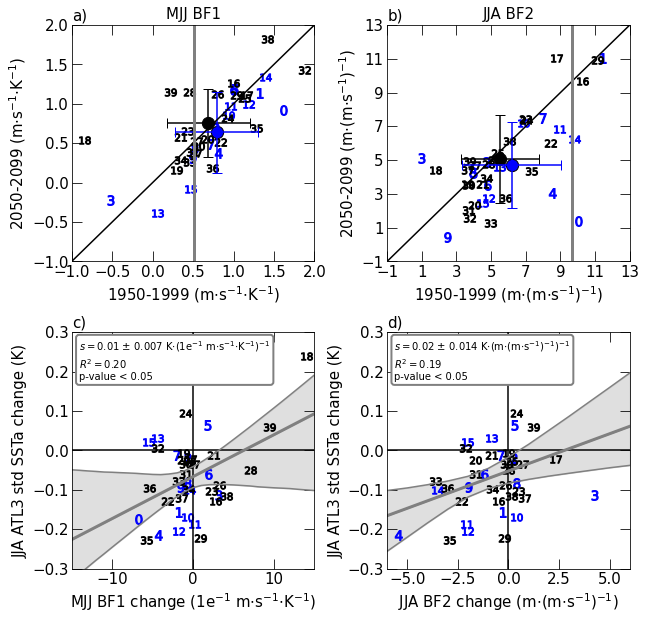

In [21]:
ftz = 15
f,ax = plt.subplots(2,2,figsize=[10,10])
ax=ax.ravel()
color_cmip5 = 'black'
color_cmip6 = 'blue'
m_cmip6 = np.arange(0,bf1_hist_cmip6_jja.alpha.shape[0],1)
m_cmip5 = np.arange(bf1_hist_cmip6_jja.alpha.shape[0],
                    bf1_hist_cmip6_jja.alpha.shape[0] + bf1_hist_cmip5_jja.alpha.shape[0],1)




## FIG a ###

x = np.arange(-1,2.1,0.1)
y = np.arange(-1,2.1,0.1)



ax[0].plot(x,y,color = 'black',label='one-to-one')
ax[0].scatter(bf1_hist_cmip6_jja_mean.alpha,
           bf1_ssp5_cmip6_jja_mean.alpha,color=color_cmip6,s = 150,
           label='Ens mean CMIP6',edgecolor='black')




for i in range(bf1_hist_cmip6_jja.alpha.shape[0]):
    if i <10:
        ax[0].scatter(-1000,-1000,
           label=bf1_hist_cmip6_jja.product[i].values,color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),
                      s=100)

        ax[0].scatter(bf1_hist_cmip6_jja.alpha[i],bf1_ssp5_cmip6_jja.alpha[i],color=color_cmip6,
                          marker=r"$ {} $".format(
                m_cmip6[i]),s=100)

    else:
        ax[0].scatter(-1000,-1000,
           label=bf1_hist_cmip6_jja.product[i].values,color=color_cmip6,
                      marker=r"$ {} $".format(m_cmip6[i]),s=150)
        

        ax[0].scatter(bf1_hist_cmip6_jja.alpha[i],bf1_ssp5_cmip6_jja.alpha[i],color=color_cmip6,
                          marker=r"$ {} $".format(m_cmip6[i]),s=150)

        
        
ax[0].scatter(bf1_hist_cmip5_jja_mean.alpha,
           bf1_ssp5_cmip5_jja_mean.alpha,color=color_cmip5,s = 150,
           label='Ens mean CMIP5',edgecolor='black')  

for k in range(bf1_hist_cmip5_jja.alpha.shape[0]):
    ax[0].scatter(-1000,-1000,
           label=bf1_hist_cmip5_jja.product[k].values,
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=150)

        
    ax[0].scatter(bf1_hist_cmip5_jja.alpha[k],bf1_ssp5_cmip5_jja.alpha[k],
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=150)

ax[0].axvline(0.51,color='grey',linewidth=3)    # bjerknes_feedback_OBS_review
ax[0].set_title('MJJ BF1',fontsize=ftz)
ax[0].set_xlabel('1950-1999 (m$\cdot$s$^{-1}$$\cdot$K$^{-1}$)',fontsize=ftz)
ax[0].set_ylabel('2050-2099 (m$\cdot$s$^{-1}$$\cdot$K$^{-1}$)',fontsize=ftz)
ax[0].tick_params(labelsize=ftz)

ax[0].set_xlim([-1,2])
ax[0].set_ylim([-1,2])
ax[0].set_xticks(np.arange(-1,2.5,0.5))
ax[0].set_yticks(np.arange(-1,2.5,0.5))



ax[0].errorbar(bf1_hist_cmip5_jja.alpha.mean(dim='product'),
              bf1_ssp5_cmip5_jja.alpha.mean(dim='product'),
             xerr=bf1_hist_cmip5_jja.alpha.std(dim='product'),
             yerr=bf1_ssp5_cmip5_jja.alpha.std(dim='product'),color='black',fmt='o',capsize=5)

ax[0].errorbar(bf1_hist_cmip6_jja.alpha.mean(dim='product'),
              bf1_ssp5_cmip6_jja.alpha.mean(dim='product'),
             xerr=bf1_hist_cmip6_jja.alpha.std(dim='product'),
             yerr=bf1_ssp5_cmip6_jja.alpha.std(dim='product'),color='blue',fmt='o',capsize=5)



### FIG b ### 

x = np.arange(-2,15,1)
y = np.arange(-2,15,1)
ax[1].plot(x,y,color = 'black',label='one-to-one')
ax[1].scatter(bf2_hist_cmip6_jja_mean.alpha,
           bf2_ssp5_cmip6_jja_mean.alpha,color=color_cmip6,s = 150,
           label='Ens mean CMIP6',edgecolor='black')




for i in range(bf1_hist_cmip6_jja.alpha.shape[0]):
    if i <10:

        ax[1].scatter(bf2_hist_cmip6_jja.alpha[i],bf2_ssp5_cmip6_jja.alpha[i],
           label=bf2_hist_cmip6_jja.product[i].values,color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),
                          s=100)

        
    else:

        ax[1].scatter(bf2_hist_cmip6_jja.alpha[i],bf2_ssp5_cmip6_jja.alpha[i],
           label=bf2_hist_cmip6_jja.product[i].values,color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),
                          s=150)

        
        
        
ax[1].scatter(bf2_hist_cmip5_jja_mean.alpha,
           bf2_ssp5_cmip5_jja_mean.alpha,color=color_cmip5,s = 150,
           label='Ens mean CMIP5',edgecolor='black')  


for k in range(bf2_hist_cmip5_jja.alpha.shape[0]):

    ax[1].scatter(bf2_hist_cmip5_jja.alpha[k],bf2_ssp5_cmip5_jja.alpha[k],
           label=bf2_hist_cmip5_jja.product[k].values,
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=150)
ax[1].set_title('JJA BF2',fontsize=ftz)
ax[1].set_xlabel('1950-1999 (m$\cdot$(m$\cdot$s$^{-1}$)$^{-1}$)',fontsize=ftz)
ax[1].set_ylabel('2050-2099 (m$\cdot$(m$\cdot$s$^{-1}$)$^{-1}$)',fontsize=ftz)
ax[1].tick_params(labelsize=ftz)
ax[1].set_xlim([-1,13])
ax[1].set_ylim([-1,13])
ax[1].set_xticks(np.arange(-1,15,2))
ax[1].set_yticks(np.arange(-1,15,2))
ax[1].axvline(9.68,color='grey',linewidth=3) # bjerknes_feedback_OBS_review


ax[1].errorbar(bf2_hist_cmip5_jja.alpha.mean(dim='product'),
              bf2_ssp5_cmip5_jja.alpha.mean(dim='product'),
             xerr=bf2_hist_cmip5_jja.alpha.std(dim='product'),
             yerr=bf2_ssp5_cmip5_jja.alpha.std(dim='product'),color='black',fmt='o',capsize=5)

ax[1].errorbar(bf2_hist_cmip6_jja.alpha.mean(dim='product'),
              bf2_ssp5_cmip6_jja.alpha.mean(dim='product'),
             xerr=bf2_hist_cmip6_jja.alpha.std(dim='product'),
             yerr=bf2_ssp5_cmip6_jja.alpha.std(dim='product'),color='blue',fmt='o',capsize=5)
## FIG d ##
ax[2].axhline(0,color='black')
ax[2].axvline(0,color='black')
x0 = np.arange(-16,17,1)


y0_sign = alpha0_sign*x0 + interp0_sign



y0_sign_test = (alpha0_sign+std0_sign*ts0)*x0 + interp0_sign

#ax[2].plot(x0,y0_sign,'green',alpha=1)

ax[2].plot(x0,y0_sign,color='grey',linewidth=3)
ax[2].plot(x0, ci_forecast_bf1_ssta[0], 'grey')
ax[2].plot(x0, ci_forecast_bf1_ssta[1], 'grey')
ax[2].fill_between(x0,y0_sign,ci_forecast_bf1_ssta[0],color='grey',alpha=0.25)
ax[2].fill_between(x0,y0_sign,ci_forecast_bf1_ssta[1],color='grey',alpha=0.25)
for i in range(bf1_changes_cmip6.product.shape[0]):
    if i<10:

        ax[2].scatter(bf1_changes_cmip6[i]*10,std_ssta_changes_cmip6[i],
                  label=bf1_changes_cmip6.product.values[i],
                  color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),s=100)

    else:

        ax[2].scatter(bf1_changes_cmip6[i]*10,std_ssta_changes_cmip6[i],
                  label=bf1_changes_cmip6.product.values[i],
                  color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),s=150)


for k in range(bf1_changes_cmip5.product.shape[0]):

    ax[2].scatter(bf1_changes_cmip5[k]*10,std_ssta_changes_cmip5[k],
                      label=bf1_changes_cmip5.product.values[k],
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=150)

ax[2].set_ylabel('JJA ATL3 std SSTa change (K)',fontsize=ftz)
ax[2].set_xlabel('MJJ BF1 change (1e$^{-1}$ m$\cdot$s$^{-1}$$\cdot$K$^{-1}$)',fontsize=ftz)
ax[2].tick_params(labelsize=ftz)
ax[2].set_ylim([-0.3,0.3])
ax[2].set_xlim([-15,15])
ax[2].set_yticks(np.arange(-0.3,0.4,0.1))


if p_value0_sign <0.05:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$(1e$^{-1}$ m$\cdot$s$^{-1}$$\cdot$K$^{-1}$)$^{-1}$' %
                     (alpha0_sign, std0_sign*ts0),
                     r'$R^{2}=%.2f$' % (r0_sign**2, ),
                    'p-value < 0.05'))
    
else:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$(1e$^{-1}$ m$\cdot$s$^{-1}$$\cdot$K$^{-1}$)$^{-1}$' %
                     (alpha0_sign, std0_sign*ts0),
                     r'$R^{2}=%.2f$' % (r0_sign**2, ),
                    'p-value > 0.05'))
props = dict(boxstyle='round', facecolor='white', ec='grey', lw=2,alpha=1)

# place a text box in upper left in axes coords
ax[2].text(0.03,
         0.97,
         textstr,
         transform=ax[2].transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)



### FIG d ###

ax[3].axhline(0,color='black')
ax[3].axvline(0,color='black')
x1 = np.arange(-6,7,1)
y1 = alpha1_sign*x1 + interp1_sign
#ax[3].plot(x1,y1,'green',alpha=0.25)

y1_sign = alpha1_sign*x1 + interp1_sign
ax[3].plot(x1,y1_sign,'grey',alpha=1)

ax[3].plot(x1,y1_sign,color='grey',linewidth=3)
ax[3].plot(x1, ci_forecast_bf2_ssta[0], 'grey')
ax[3].plot(x1, ci_forecast_bf2_ssta[1], 'grey')
ax[3].fill_between(x1,y1_sign,ci_forecast_bf2_ssta[0],color='grey',alpha=0.25)
ax[3].fill_between(x1,y1_sign,ci_forecast_bf2_ssta[1],color='grey',alpha=0.25)



for i in range(bf2_changes_cmip6.product.shape[0]):
    if i <10:

        ax[3].scatter(bf2_changes_cmip6[i],std_ssta_changes_cmip6[i], 
                  color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),s=100)

    else:

        ax[3].scatter(bf2_changes_cmip6[i],std_ssta_changes_cmip6[i], 
                  color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),s=150)

    
for k in range(bf2_changes_cmip5.product.shape[0]):

    ax[3].scatter(bf2_changes_cmip5[k],std_ssta_changes_cmip5[k],
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=150)

           
ax[3].tick_params(labelsize=ftz)
ax[3].set_ylabel('JJA ATL3 std SSTa change (K)',fontsize=ftz)
ax[3].set_xlabel('JJA BF2 change (m$\cdot$(m$\cdot$s$^{-1}$)$^{-1}$)',fontsize=ftz)
ax[3].set_xlim([-6,6])
ax[3].set_yticks(np.arange(-0.3,0.4,0.1))

if p_value1_sign<0.05:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$(m$\cdot$(m$\cdot$s$^{-1}$)$^{-1}$)$^{-1}$' %
                     (alpha1_sign, std1_sign*ts1),
                     r'$R^{2}=%.2f$' % (r1_sign**2, ),
                    'p-value < 0.05'))
else:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$s$^{-1}$' %
                     (alpha1_sign, std1_sign*ts1),
                     r'$R^{2}=%.2f$' % (r1_sign**2, ),
                    'p-value > 0.05'))
    
props = dict(boxstyle='round', facecolor='white', ec='grey', lw=2)

plt.subplots_adjust( hspace=0.3,
                    wspace=0.3)
# place a text box in upper left in axes coords
ax[3].text(0.03,
         0.97,
         textstr,
         transform=ax[3].transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)


ax[0].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True,length=10,direction='in')

ax[1].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True,length=10,direction='in')
ax[2].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True,length=10,direction='in')

ax[3].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True,length=10,direction='in')



ax[0].text(0,
         1.02, 'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,
         1.02, 'b)',transform=ax[1].transAxes,size=ftz)

ax[2].text(0,
         1.02, 'c)',transform=ax[2].transAxes,size=ftz)
ax[3].text(0,
         1.02, 'd)',transform=ax[3].transAxes,size=ftz)


plt.savefig(path_fig + 'figure_S1_review_BF1_BF2.png',
             dpi = 300,
            bbox_inches='tight')